# Using Datashader to Create World Maps

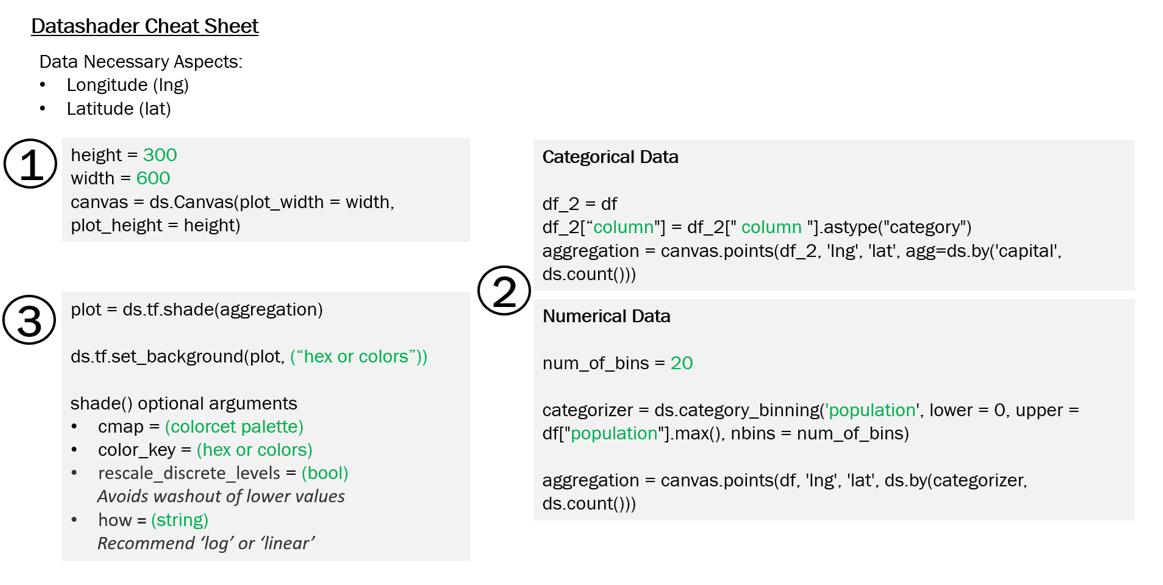

## Import libraries

In [20]:
import datashader as ds   ## Pipelines big data 
import colorcet as cc ## Gives us some good color options 
from colour import Color ## Allows you to create your own color scale 

import pandas as pd 

## Load in our Data 

In [21]:
df = pd.read_csv("worldcities.csv")

In [22]:
df.head(5)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519


In [23]:
df.shape

(42905, 11)

In [24]:
## Setting up our map 

## Canvas declares how you want to plot it 

height = 300
width = 600
canvas = ds.Canvas(plot_width = width, plot_height = height)

## Categorical Data Example 

In [25]:
df['capital'].value_counts()


minor      5952
admin      3611
primary     249
Name: capital, dtype: int64

In [26]:
df_2 = df 
df_2["capital"] = df_2["capital"].astype("category")

In [27]:
## Aggregating our data 
aggregation = canvas.points(df_2, 'lng', 'lat', agg=ds.by('capital', ds.count()))

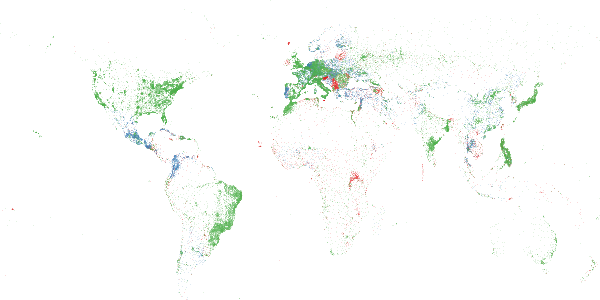

In [28]:
plot = ds.tf.shade(aggregation, cmap=cc.fire)
plot

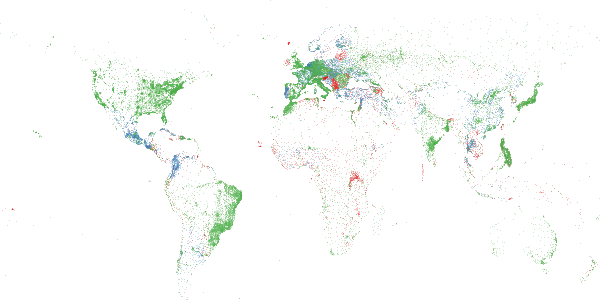

In [29]:
plot = ds.tf.shade(aggregation, cmap=cc.fire, rescale_discrete_levels = True)
plot

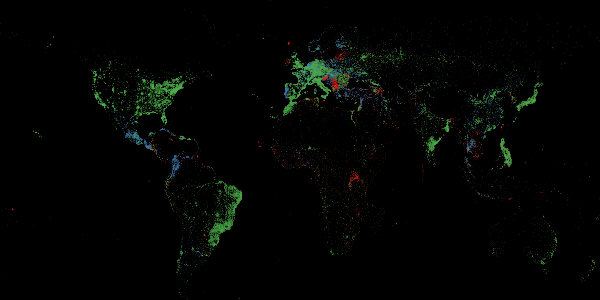

In [30]:
plot = ds.tf.shade(aggregation, cmap=cc.fire)
plot = ds.tf.set_background(plot, "black")
plot

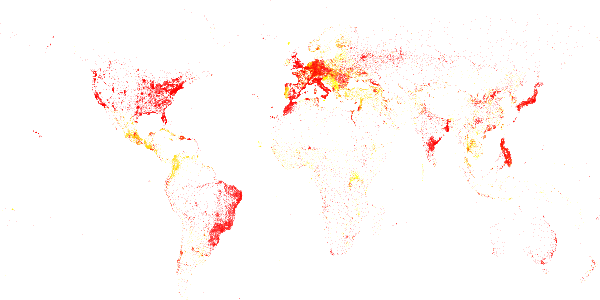

In [31]:
plot = ds.tf.shade(aggregation, color_key = ["yellow", "gold", "red"])
plot

## Numerical Example

In [32]:
num_of_bins = 20

categorizer = ds.category_binning('population', lower = 0, upper = df["population"].max(), nbins = num_of_bins)

aggregation = canvas.points(df, 'lng', 'lat', ds.by(categorizer, ds.count()))

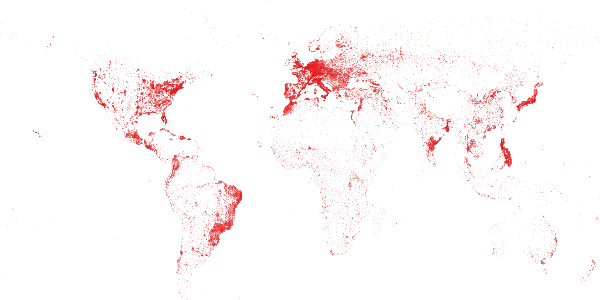

In [33]:
plot = ds.tf.shade(aggregation, cmap = "fire")
plot

In [34]:
color1 = Color("#8b24e1")
colors = list(color1.range_to(Color("#14a132"), num_of_bins + 1))

## Code credit: https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python 


In [35]:
storing = [None]*len(colors)
for i in range(0,len(colors)):
    storing[i] = str(colors[i])

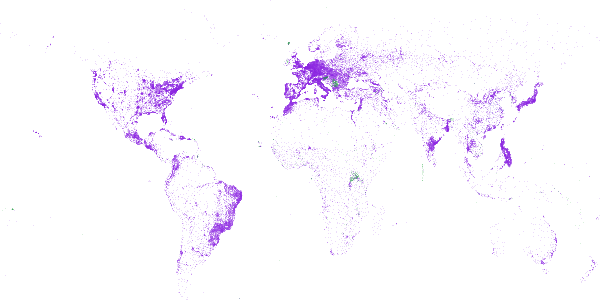

In [36]:
plot = ds.tf.shade(aggregation, color_key = storing)
plot

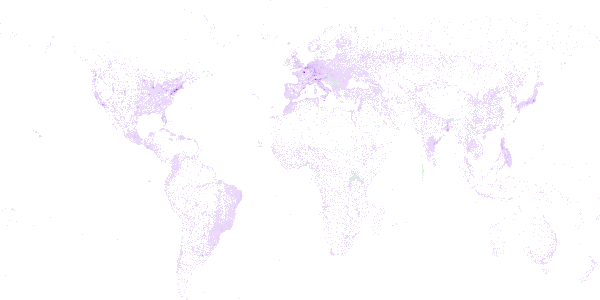

In [37]:
plot = ds.tf.shade(aggregation, color_key = storing, how = "linear")
plot